In [37]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
import random

In [38]:
class stateSchema(TypedDict):
    name:str
    guesses:list[int]
    attempts:int
    lower:int
    upper:int

In [ ]:
def guess(state:stateSchema)->stateSchema:
    state['attempts']+=1
    state['guesses'].append(random.randint(state['lower'],state['upper']))
    return state

def hintNode(state:stateSchema)->stateSchema:
    last_guess=state['guesses'][-1]
    if(last_guess<15):
        state['lower']=last_guess
    else:
        state['upper']=last_guess
    return state


def should_continue(state:stateSchema)->str:
    if(state['attempts']==7 or state['guesses'][-1]==15):
        return "end"
    return "loop"

In [40]:
graph=StateGraph(stateSchema)
graph.add_node("guesser",guess)
graph.add_node("hint_node",hintNode)
graph.add_edge(START,"guesser")
graph.add_edge("guesser","hint_node")
graph.add_conditional_edges("hint_node",should_continue,
                            {
                                "loop":"guesser",
                                "end":END
                            })
app=graph.compile();
result=app.invoke({"name":"nisarg","guesses":[],"attempts":0,"lower":1,"upper":20})
print(result)

{'name': 'nisarg', 'guesses': [17, 12, 15], 'attempts': 3, 'lower': 12, 'upper': 15}


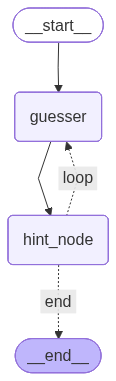

In [41]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))